In [6]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Loading the csv file with the info about the wav files
metadata = pd.read_csv('/Users/adi/Downloads/archive (17)/bird_songs_metadata.csv')
metadata.head()

,id,genus,species,subspecies,name,recordist,country,location,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav
1,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-1.wav
2,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-4.wav
3,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-5.wav
4,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-6.wav


In [9]:
# Lists for storing the filepaths and labels
file_paths = []
labels = []

audio_dir = '/Users/adi/Downloads/archive (17)/wavfiles/'

for index, row in metadata.iterrows():
    file_path = os.path.join(audio_dir, row['filename'])
    if os.path.exists(file_path):
        file_paths.append(file_path)
        labels.append(row['species'])

file_paths[:5], labels[:5]

(['/Users/adi/Downloads/archive (17)/wavfiles/557838-0.wav',
  '/Users/adi/Downloads/archive (17)/wavfiles/557838-1.wav',
  '/Users/adi/Downloads/archive (17)/wavfiles/557838-4.wav',
  '/Users/adi/Downloads/archive (17)/wavfiles/557838-5.wav',
  '/Users/adi/Downloads/archive (17)/wavfiles/557838-6.wav'],
 ['bewickii', 'bewickii', 'bewickii', 'bewickii', 'bewickii'])

In [10]:
# We will look at the waveform and melspectrogram of the first wav file of each of the species
first_occurrences = {}

# Iterate over the file paths and corresponding labels
for file_path, label in zip(file_paths, labels):
    # Check if the species label is already present in the dictionary
    if label not in first_occurrences:
        # If not present, add the file path as the first occurrence of the species
        first_occurrences[label] = file_path
        
first_occurrences

{'bewickii': '/Users/adi/Downloads/archive (17)/wavfiles/557838-0.wav',
 'polyglottos': '/Users/adi/Downloads/archive (17)/wavfiles/563125-0.wav',
 'migratorius': '/Users/adi/Downloads/archive (17)/wavfiles/564545-0.wav',
 'melodia': '/Users/adi/Downloads/archive (17)/wavfiles/565242-0.wav',
 'cardinalis': '/Users/adi/Downloads/archive (17)/wavfiles/564312-0.wav'}

In [16]:
# Function to load audio file and extract features
def load_and_extract_features(file_path):
    y, sr = librosa.load(file_path)
    waveform = y
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    return waveform, log_mel_spectrogram, sr

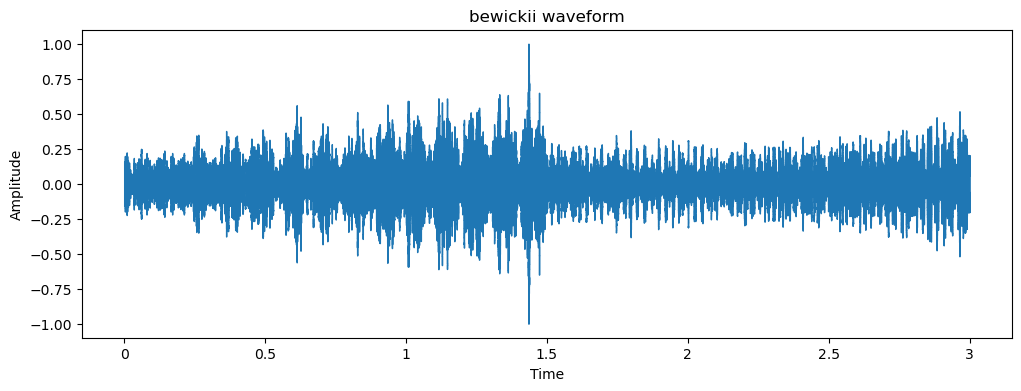

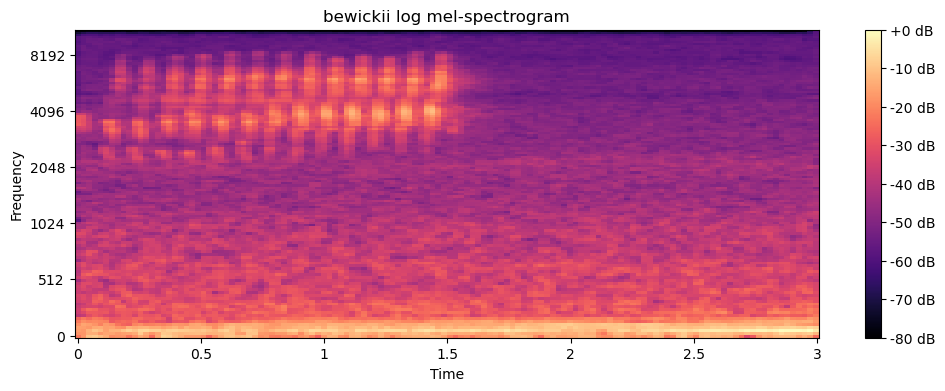

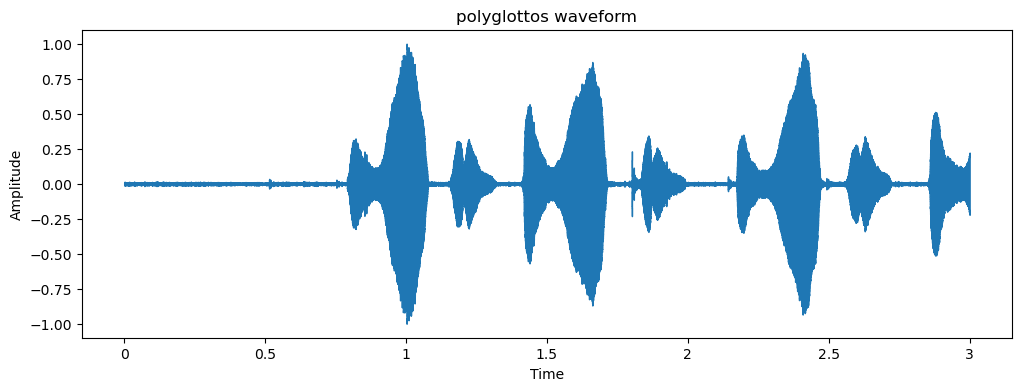

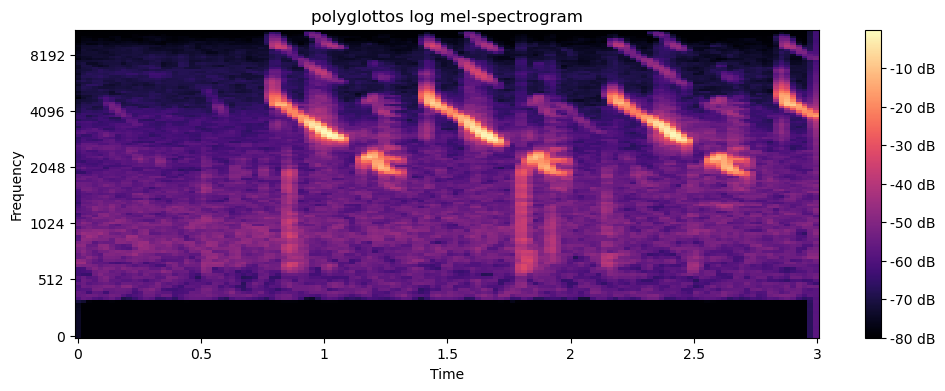

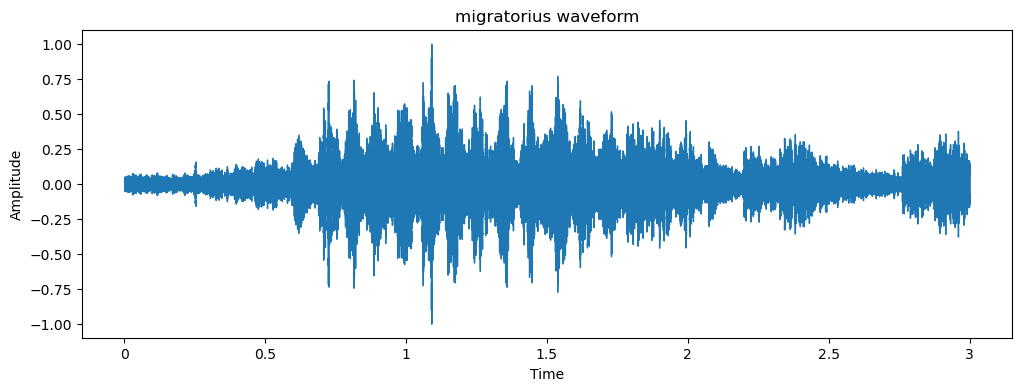

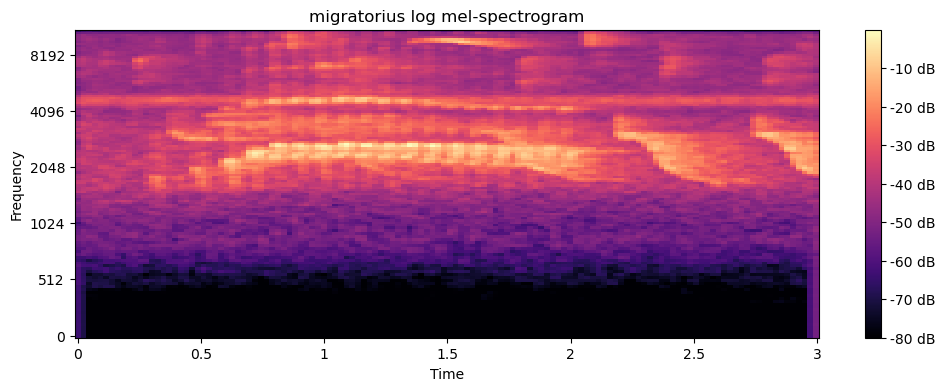

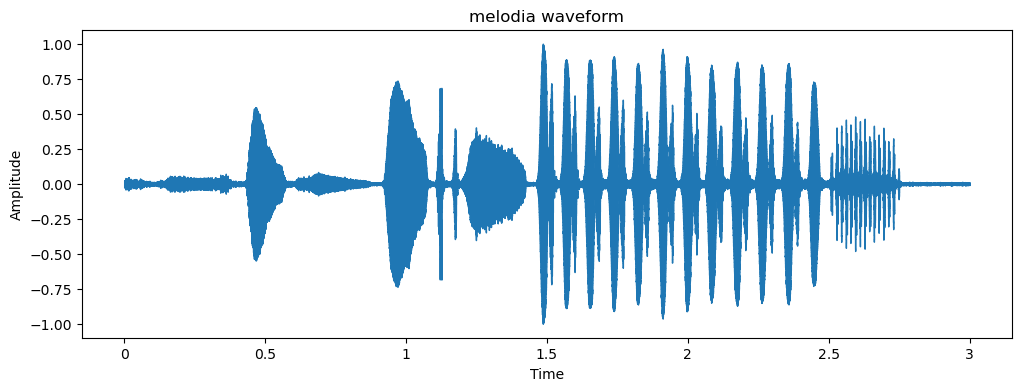

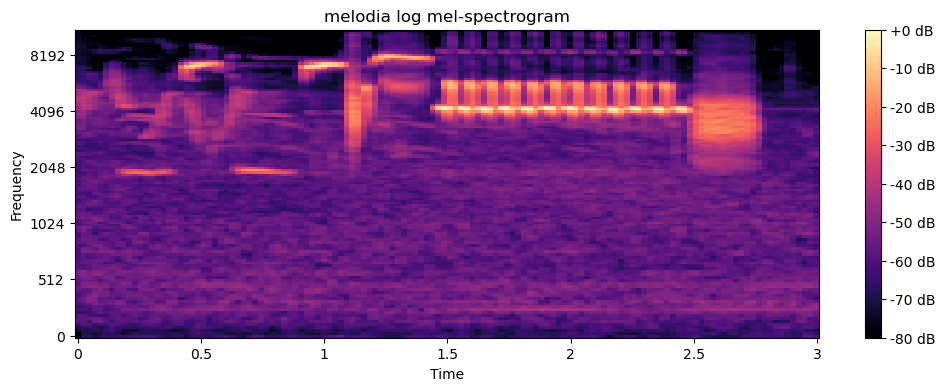

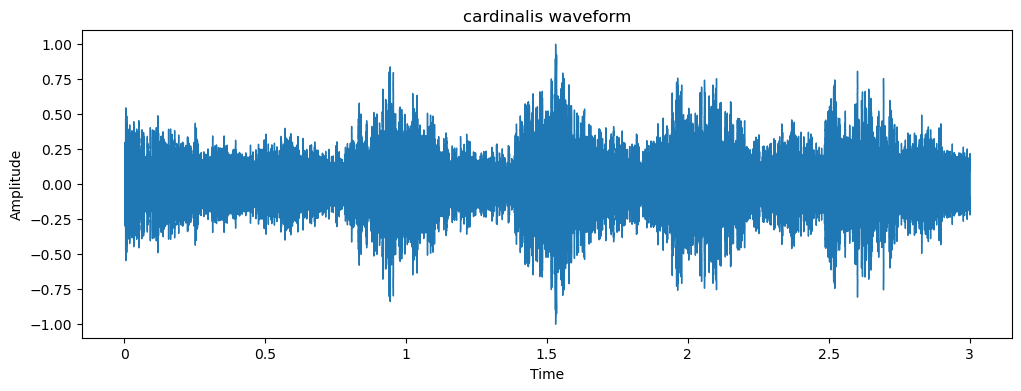

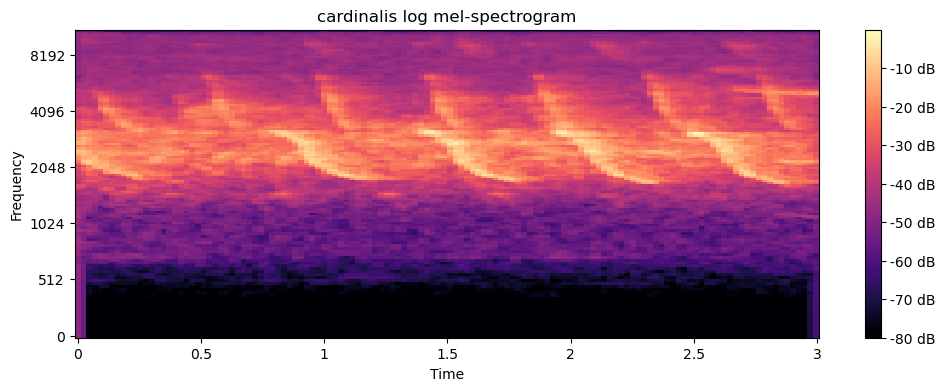

In [18]:
# Plot graphs for each species
for species, filepath in first_occurrences.items():
    
    waveform, log_mel_spectrogram, sr = load_and_extract_features(filepath)
    
    # Plot waveform
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(waveform, sr=sr)
    plt.title(f'{species} waveform')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

    # Plot log mel-spectrogram
    
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(log_mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'{species} log mel-spectrogram')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()